In [1]:
import os,sys
import numpy as np

import matplotlib
import pylab as py

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-eyzoo4mz because the default path (/home/jovyan/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
from scipy.special import binom,factorial,gamma
from scipy.integrate import quad

In [3]:
fitpack_path = '/work/JAM/barryp/JAM/fitpack2/'
#os.environ['FITPACK'] = fitpack_path
sys.path.insert(0, fitpack_path)

In [4]:
os.environ['FITPACK']='/work/JAM/barryp/JAM/fitpack2/'
os.environ['LHAPDF_DATA_PATH']='/work/JAM/apps/lhapdf_tables/'
os.environ['LHAPDF_DATA_PATH']='/work/JAM/barryp/misc/:'+os.environ['LHAPDF_DATA_PATH']
os.environ['LHAPDF_DATA_PATH']='/work/JAM/apps/lhapdf_tables/more/more1:'+os.environ['LHAPDF_DATA_PATH']
os.environ["PATH"]='/work/JAM/apps/bin:'+os.environ["PATH"]

In [5]:
from tools.tools import lprint

In [6]:
def jacobipoly(n,alpha,beta,x):
    jacobi=0
    for j in range(n+1):
        omega=binom(n,j)*(-1)**j/factorial(n)*gamma(alpha+n+1)*gamma(alpha+beta+n+j+1)/gamma(alpha+beta+n+1)/gamma(alpha+j+1)
        jacobi+=omega*x**j
    return jacobi

In [23]:
alpha=-0.5
beta=3
NU=np.linspace(0.19,20,30)
sig0n=lambda n,nu: quad(lambda x: np.cos(nu*x)*x**alpha*(1-x)**beta*jacobipoly(n,alpha,beta,x),0,1)[0]

In [24]:
sig0n(0,NU[0])

0.913785897631456

In [25]:
sigs=[]
for i in range(10):
    lprint('progress: %i/%i'%(i,10))
    sigs.append(np.array([sig0n(i,_) for _ in NU]))

progress: 2/10

<ipython-input-23-eaf0d8de135f>:4: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  sig0n=lambda n,nu: quad(lambda x: np.cos(nu*x)*x**alpha*(1-x)**beta*jacobipoly(n,alpha,beta,x),0,1)[0]


progress: 9/10

[[<matplotlib.lines.Line2D at 0x7f7ed10fc7f0>],

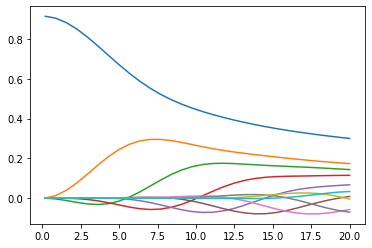

In [27]:
ax=py.subplot(111)
[ax.plot(NU,_) for _ in sigs]
# ax.semilogy()

In [29]:
NU=np.linspace(0.19,4.75,40)
print(NU)

[0.19       0.30692308 0.42384615 0.54076923 0.65769231 0.77461538
 0.89153846 1.00846154 1.12538462 1.24230769 1.35923077 1.47615385
 1.59307692 1.71       1.82692308 1.94384615 2.06076923 2.17769231
 2.29461538 2.41153846 2.52846154 2.64538462 2.76230769 2.87923077
 2.99615385 3.11307692 3.23       3.34692308 3.46384615 3.58076923
 3.69769231 3.81461538 3.93153846 4.04846154 4.16538462 4.28230769
 4.39923077 4.51615385 4.63307692 4.75      ]


In [30]:
storage=np.array([sig0n(1,_) for _ in NU])

<ipython-input-23-eaf0d8de135f>:4: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  sig0n=lambda n,nu: quad(lambda x: np.cos(nu*x)*x**alpha*(1-x)**beta*jacobipoly(n,alpha,beta,x),0,1)[0]


In [33]:
print(storage)

[0.00061498 0.00160265 0.00305033 0.00495261 0.00730238 0.01009088
 0.01330774 0.01694102 0.02097731 0.02540174 0.03019811 0.03534892
 0.04083551 0.04663811 0.05273594 0.05910735 0.06572989 0.0725804
 0.07963519 0.08687008 0.09426056 0.10178188 0.10940917 0.11711755
 0.12488228 0.13267879 0.14048287 0.14827072 0.15601906 0.16370525
 0.17130735 0.17880423 0.18617564 0.19340226 0.2004658  0.20734907
 0.21403599 0.22051166 0.22676243 0.23277585]
